In [2]:
import numpy as np
import pandas as pd
import thinkplot as tp
import thinkstats2 as ts

In [3]:
# Section - 2
data = pd.read_csv("basketball_players.csv")
col = ["GP", "points"]
target_data = data[col]
target_data = target_data[~(target_data == 0).any(axis=1)]

C:\Users\ahmetkaycioglu\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
games_played = target_data["GP"]  
points = target_data["points"]    # Actual data i'm going to use

In [5]:
# Section - 3
print ("Descriptive statistics:\n")
print ("mean:" + str(int(points.mean())) + "\nvariance:" + str(int(points.var())) + "\nstandard deviance:" + str(int(points.std()))
      + "\nmedian:" + str(int(points.median())) + "\nmode:" + str(int(points.mode())))

Descriptive statistics:

mean:503
variance:253000
standard deviance:502
median:344
mode:2


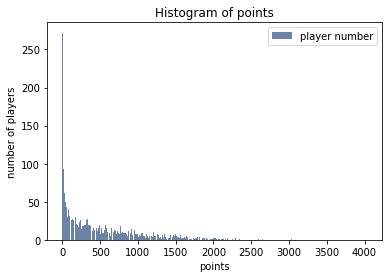

In [6]:
# Histogram 
hist = ts.Hist(points)
tp.Hist(hist, label="player number")
tp.Config(xlabel="points", ylabel="number of players", title="Histogram of points")

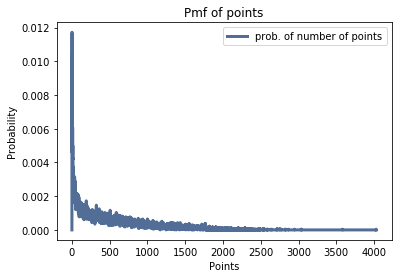

In [7]:
# PMF
pmf = ts.Pmf(points)
tp.Pmf(pmf, label="prob. of number of points")
tp.Config(xlabel="Points", ylabel="Probability", title="Pmf of points")

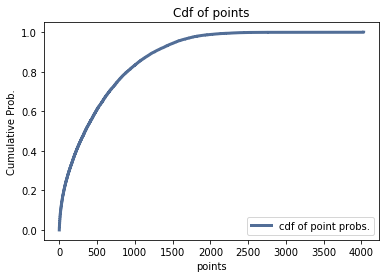

In [8]:
# CDF
cdf = ts.Cdf(points)
tp.Cdf(cdf, label="cdf of point probs.")
tp.Config(xlabel="points", ylabel="Cumulative Prob.", title="Cdf of points")

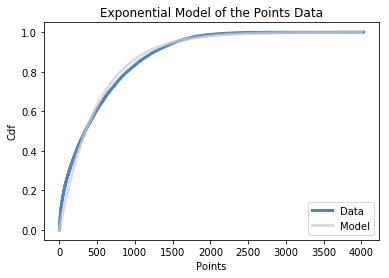

In [147]:
# Section - 4
# Used exponential distribution for modelling data
tp.PrePlot(2)
cdf = ts.Cdf(points, label="Data")
tp.cdf(cdf)

xs, ps = ts.RenderExpoCdf((1/points.mean()), 0, 4000, 23000)
tp.Plot(xs, ps, color="0.8", label="Model")
tp.Config(xlabel="Points", ylabel="Cdf", title="Exponential Model of the Points Data", loc="lower right")

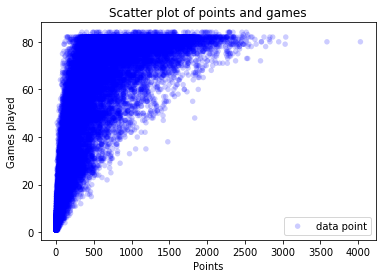

In [152]:
# Section - 5 
# Used pearson corr., spearman corr. and scatter plot to get an idea of the relationship between variables
tp.Scatter(points, games_played, label="data point")
tp.Config(title="Scatter plot of points and games", xlabel="Points", ylabel="Games played")

In [6]:
# functions for calculating correlation
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = ts.MeanVar(xs)
    meany, vary = ts.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [7]:
Corr(points, games_played), SpearmanCorr(points, games_played)

(0.7396324101123817, 0.8703939701785037)

In [8]:
# Section - 6
# preparing the testing functions using hypothesis test of thinkstats2.
class hypotest(ts.HypothesisTest):
    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(ts.Corr(xs, ys))
        return test_stat
    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys
    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel())for _ in range(iters)]
        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / float(iters)

In [10]:
# checking whether the correlation is by chance or real
data = points, games_played
pt = hypotest(data)
pval = pt.PValue()
print ("Actual Correlation: ",ts.Corr(points, games_played)," P-Value: ", pval)

Actual Correlation:  0.7396324101123817  P-Value:  0.0


In [9]:
# Checking ts.Corr function because the p value in the previous line is 0.0
#for i in range(100):
#    print(abs(ts.Corr(np.random.permutation(points), games_played)))
# This show they are really highly correlated for real.

0.0031087568555623
0.0025885793447978727
0.006540612308406867
0.0023658390936211146
0.007534042667383301
0.006076872856176786
0.004615131735194973
0.014991466893255203
0.007951488214224072
0.011923738591526649
0.010148077461363493
0.0014854450393635866
0.0017581944307301421
0.011786057472864217
0.0076397362131366735
0.005823244792010711
0.0004008989903778734
0.009733410728228243
0.0009100242874733036
0.005180867883173182
0.0032749813133450254
0.003216593200013155
0.006064703020044898
0.005206332524753128
0.007773537713669646
0.009774322949729498
0.0019549317117301267
0.0018735563022707219
0.0018276027237333718
0.011880971372716613
0.007431339064030642
0.012727086427911434
0.002197717106504108
0.0014720047576338973
0.0058339740191188155
0.010595713889364821
0.006045941448995792
0.0029894092704615834
0.0006652063851112578
0.0007938630620999057
0.004132857074231661
0.003994286802092591
0.008652579914043028
0.004372481318674756
0.0009463415742210949
0.00038035281002638053
0.001478578107755